In [5]:
using Revise
using LinearAlgebra
using TransportBasedInference
using Statistics
using Distributions
using SpecialFunctions
using Test
using ForwardDiff
using LoopVectorization

┌ Info: Precompiling TransportBasedInference [bdf749b0-1400-4207-80d3-e689c0e3f03d]
└ @ Base loading.jl:1278
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has b

In [2]:
using Plots
default(fontfamily = "Computer Modern",
        tickfont = font("Computer Modern", 9), 
        titlefont = font("Computer Modern", 14), 
        guidefont = font("Computer Modern", 12),
        legendfont = font("Computer Modern", 10),
        grid = false)

using LaTeXStrings

In [39]:
B = PhyHermiteBasis(10)

Basis of 10 functions: 0th -> 9th degree Physicist Hermite function


In [40]:
size(B)

10

In [57]:
ProHermite(2)(2.5)-(2.5^2-1)*exp(-2.5^2/4)

0.0

In [47]:
@time dV = vander(B, 0, [2.0])

  0.000008 seconds (27 allocations: 704 bytes)


1×10 Array{Float64,2}:
 0.101654  0.28752  0.503161  0.586898  …  -0.392848  -0.0278436  0.34413

In [ ]:
Ne = 200
x = randn(Ne)
B = CstProHermiteBasis(6)

        dV = vander(B, k, x)
        dVtrue = zeros(Ne, size(B))

        for i=1:B.m
            dVtrue[:,i] .= derivative(FamilyScaledProHermite[i], k , x)
        end
        @test norm(dV - dVtrue)<1e-6
    end

In [44]:
@testset "Verify vander for ProHermiteBasis: evaluation, first and second derivatives" begin
    Ne = 200
    x = randn(Ne)
    B = ProHermiteBasis(6)
    ktab = [0; 1; 2]
    for k in ktab
        dV = vander(B, k, x)
        dVtrue = zeros(Ne, size(B))

        for i=1:B.m
            dVtrue[:,i] .= derivative(FamilyScaledProHermite[i], k , x)
        end
        @test norm(dV - dVtrue)<1e-6
    end
end

Verify vander for ProHermiteBasis: evaluation, first and second derivatives: Error During Test at In[44]:1
  Got exception outside of a @test
  AssertionError: Wrong dimension of the Vander matrix
  Stacktrace:
   [1] evaluate!(::SubArray{Float64,2,Array{Float64,2},Tuple{Base.Slice{Base.OneTo{Int64}},UnitRange{Int64}},true}, ::ProHermite, ::Array{Float64,1}) at /media/mat/HDD/TransportBasedInference.jl/src/hermitefunction/prohermite.jl:136
   [2] vander!(::SubArray{Float64,2,Array{Float64,2},Tuple{Base.Slice{Base.OneTo{Int64}},UnitRange{Int64}},true}, ::ProHermite, ::Int64, ::Array{Float64,1}) at /media/mat/HDD/TransportBasedInference.jl/src/hermitefunction/prohermite.jl:193
   [3] vander! at /media/mat/HDD/TransportBasedInference.jl/src/hermitemap/basis.jl:170 [inlined]
   [4] vander!(::Array{Float64,2}, ::ProHermiteBasis, ::Int64, ::Array{Float64,1}) at /media/mat/HDD/TransportBasedInference.jl/src/hermitemap/basis.jl:316
   [5] vander(::ProHermiteBasis, ::Int64, ::Array{Float64,1}) 

LoadError: [91mSome tests did not pass: 0 passed, 0 failed, 1 errored, 0 broken.[39m

In [3]:
Ny = 1
Nx = 1
Ne = 100

X = Matrix([   0.096932076386797  -0.062113573952594
   1.504907056818036  -1.270761688825393
   0.122588515870727   0.138604054973047
   0.095040305032907  -0.097989669097228
   0.056360334325948  -0.098106117790437
   0.034757567319988  -0.152864122871058
   0.260831995265119  -0.564465060524812
   0.191690179163063   0.097123146831467
   0.131835643270215  -0.303532750891873
   0.121404994711150  -0.414223062306829
  -0.046027217149733   0.267918560101165
   0.222891154723706   0.054734106232808
   0.264238681579693  -0.561044970267127
   0.021345749974379   0.023020769850203
   0.395423632217738  -0.619284581169702
   0.231607199656522   0.319089487692097
   0.389505867820041   0.572610562725449
  -0.146845693861564  -0.007959126279965
   0.138489687840940   0.330481872227252
   1.617286792209003  -1.272765331253319
   0.013078993247482   0.006243503157725
   0.304266481947197  -0.508127858160603
  -0.134224572142272  -0.057784550290700
   0.058245459428341  -0.388163133932979
   0.143773871017238  -0.569911233902741
  -0.020852128497605   0.159888469685458
   0.042924979621615  -0.285726823344180
   0.566514904142701  -0.815010017214964
   0.022782788493659  -0.468191560991914
  -0.072005082647238  -0.139317736738881
  -0.088861617714439  -0.042323531263036
   0.146019714866274  -0.441835803838725
   0.062827433058116   0.255887684932700
   0.024887528661752  -0.036316627235643
   0.079288422911736   0.009625876863572
   0.124929172288805  -0.196711126223702
   0.886085483369468   1.012837297288688
  -0.062868708331948   0.065147939699519
   0.117047537973873  -0.301180703268764
   0.147117619773736   0.466610279392604
   0.690523534483231   0.722717906410571
  -0.110919157441807   0.000008657527041
   2.055034349742512   1.423365847218695
   0.091130503033388  -0.192933472923564
   0.075510323340039   0.075087088602955
  -0.181121769738736  -0.158594842114751
  -0.080866378396288  -0.081393537160189
   0.184561993178819   0.409693133491638
  -0.032018126656783   0.040851821749292
   0.702808256935611   0.978185567019995
  -0.029041940950512   0.097268795862442
   1.406479923500753  -1.166340130567743
  -0.109758856235453  -0.297180107753266
   0.236494055349260   0.548223372779986
  -0.108550945852467  -0.097740533128956
   0.908726493797006  -0.957752761353643
   0.178092997560103  -0.359297653971968
   1.103683368372646  -1.064482193617671
   1.907065203740822   1.349542162065178
   0.523722913693736   0.725695151794695
   0.261131020580618   0.576363120484564
   0.118044539009197   0.196304662470752
   0.289261334786348   0.399639383890177
   0.902906400981006  -0.957301599045371
  -0.054657884786803  -0.292760625531884
  -0.021735291600425   0.029650166664389
   0.065200888050752  -0.295894159582647
   1.486186253485923  -1.217814186300608
   0.889545420155124   0.939789761164950
  -0.174386606410644  -0.092037014472893
  -0.065037226616579   0.009771974040525
   0.074486430996400  -0.287910597788305
   0.174336742307535  -0.400464726305446
   0.096781997529499  -0.153178844921250
   0.796408810115516   0.881930856163525
   0.005874471676882   0.067750993468743
   0.156654113730103  -0.239182272065197
   0.333688106104332  -0.629954291766549
   0.086388606764696   0.305488995071947
   0.211268899950691  -0.299878322704640
   0.104223240397571   0.199354790284364
   0.336858958710283  -0.620166113933000
   0.145071750152222   0.250136305618056
   0.032242317206686  -0.233223578816564
   0.064558616046395  -0.007577632839606
  -0.055022872335109  -0.190212128003969
  -0.169436992810515  -0.206948615170099
   0.150088939478557   0.090560438773547
   0.256256842094403   0.598874371523965
   0.340882741111244  -0.516594535669757
   0.278186325120137  -0.547968005821968
   0.645979568807173  -0.827959899268083
   0.436535833804569   0.689957746461832
   0.268437499571141   0.341281325011944
   0.120485843238972  -0.301999984465851
   0.160365386980321  -0.202012022307596
   0.154560496835611   0.244912011403144
   0.117966782622546   0.342990099492354
   0.280465408470057  -0.526206432878627
   1.174002195932550   1.136790584581798]')

2×100 Array{Float64,2}:
  0.0969321   1.50491  0.122589   0.0950403  …  0.117967   0.280465  1.174
 -0.0621136  -1.27076  0.138604  -0.0979897     0.34299   -0.526206  1.13679

In [4]:
S = HermiteMap(10, X; diag = true, b = "CstProHermiteBasis")

LoadError: [91mUndefVarError: HermiteMap not defined[39m

In [20]:
Z = transform(S.L, X)

2×100 Array{Float64,2}:
 -0.406019    2.72491  -0.348966  …  -0.359244   0.00210553  1.98907
 -0.0104857  -2.25479   0.362221      0.741739  -0.872246    2.21572

In [19]:
@time optimize(S, X, 10; withconstant = false, withqr = false, verbose = true, hessprecond = false)

1 terms - Training error: 1.4139385332046723
abs.(dJ) = [0.08697439680770927]
1 terms - Training error: 1.4033604465919078
2 terms - Training error: 1.315683079440682
3 terms - Training error: 1.0273753857895662
4 terms - Training error: 1.0271964110653464
5 terms - Training error: 0.9691689421023068
6 terms - Training error: 0.9296916718741631
7 terms - Training error: 0.9166524274485802
8 terms - Training error: 0.916623646082729
9 terms - Training error: 0.9141946182904929
10 terms - Training error: 0.903723014639628
1 terms - Training error: 1.4139385332046726
abs.(dJ) = [0.010157345629800047, 0.005748753451550599]
1 terms - Training error: 1.4137896784421646
2 terms - Training error: 1.4071828898873442
3 terms - Training error: 1.4043019971247528
4 terms - Training error: 1.3774651998877836
5 terms - Training error: 1.3746918233087988
6 terms - Training error: 1.3743452192243253
7 terms - Training error: 1.366285066307985
8 terms - Training error: 1.3607785395000225
9 terms - Trai

Hermite map of dimension 2:
Hermite map component of dimension 1 with Nψ = 10 active features
Hermite map component of dimension 2 with Nψ = 10 active features


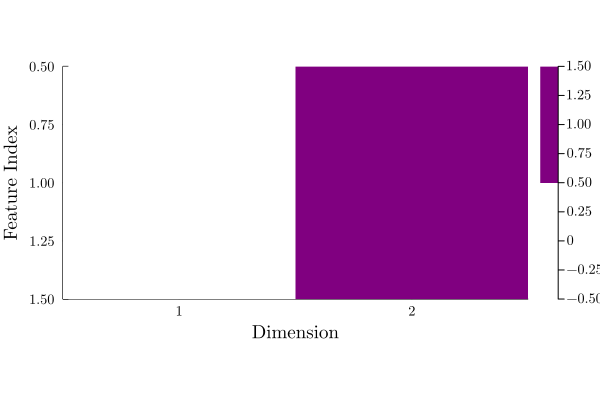

In [106]:
plot(S[2].I.f)

In [107]:
S[2].I.f

ExpandedFunction(10, 1, 2, MultiBasis(Basis of 10 functions: Constant, 0th -> 8th degree Probabilistic Hermite function
, 2), [0 1], [2], [0.02930966497598957])

In [108]:
F = MultiFunction(MultiBasis(CstProHermite(10), 2), [1; 0])

MultiFunction(10, 2, MultiBasis(Basis of 10 functions: Constant, 0th -> 8th degree Probabilistic Hermite function
, 2), [1, 0])

In [91]:
F([2.0; 1.0])

(F.B.B[F.α[i] + 1])(x[i]) = 0.23235956299061172
(F.B.B[F.α[i] + 1]).Poly = 0-th order probabilistic Hermite polynomial 0.631619, scaled = true

(F.B.B[F.α[i] + 1])(x[i]) = 1.0


LoadError: [91mtype ProPolyHermite has no field Poly[39m

In [89]:
exp(-1.0)

0.36787944117144233

In [66]:
fieldnames(typeof(CstLinProHermite(10)))

(:m,)

In [93]:
H = ProHermite(0; scaled = true)

0-th order probabilistic Hermite function, scaled = true


In [101]:
H.Poly.P.coeffs

(0.6316187777460647,)

In [40]:
getcoeff(S[1])

10-element Array{Float64,1}:
  -5.908805948799305
   6.017490204431161
  12.466205346896192
 -18.185830474062687
  25.336887324775816
 -23.68485540268222
  19.62958201263969
 -10.722884868943469
   5.065198839810798
  -0.19373539526748992

In [41]:
getidx(S[1])

10×1 Array{Int64,2}:
 0
 1
 2
 3
 4
 5
 6
 7
 8
 9

In [42]:
getidx(S[2])

10×2 Array{Int64,2}:
 0  0
 0  1
 0  2
 1  0
 0  3
 0  4
 2  0
 3  0
 4  0
 5  0

https://math.stackexchange.com/questions/2753316/generating-a-random-tridiagonal-symmetric-positive-definite-matrix

In [11]:
function triposdef(N)
#     The function generates a random tridiagonal symmetric 
#     positive definite N by N matrix;
    b = randn(N-1);
    a = [abs.(b); 0] + [0; abs.(b)] + abs.(randn(N));
    return SymTridiagonal(a, b)
end

triposdef (generic function with 1 method)

In [12]:
Nx = 10
Ne = 5000

Σ = Matrix(triposdef(10))
L = cholesky(Σ)
πX = MvNormal(zeros(Nx), Σ)

FullNormal(
dim: 10
μ: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Σ: [1.799977726910084 -1.2710031277547527 … 0.0 0.0; -1.2710031277547527 1.9998142504744736 … 0.0 0.0; … ; 0.0 0.0 … 2.5363048299449256 0.48736717774054455; 0.0 0.0 … 0.48736717774054455 1.0588573538383155]
)


In [13]:
X = rand(πX, Ne)

# X = randn(Nx, Ne).^2 + randn(Nx, Ne) .+ randn(Nx) 

10×5000 Matrix{Float64}:
 -1.75605    0.298408   2.43454   …   1.18959    0.801588  -0.521807
  2.20878   -0.740353  -0.561104     -0.234028  -1.66734    1.11025
 -1.09635    0.580696  -0.233264      0.508054  -0.200635  -1.20261
 -1.83717   -2.99501   -1.29036      -1.58589    0.681297  -2.36063
 -1.76587   -3.7907    -1.17588      -1.72831    2.37607   -0.841539
  1.4299     1.64954    1.45144   …  -0.648666   1.56303    0.465264
 -2.23947    1.35618   -0.22         -0.744631   1.48166    1.15091
 -1.20777   -1.33091   -0.521699      0.908563   4.51627   -0.449185
  0.679797   3.18355    0.331697     -0.623694  -4.2661     0.0234081
 -2.05359    1.43926   -0.901756     -0.461244  -1.45512    0.894178

In [14]:
m = 30
S = HermiteMap(m, X; diag = true, α = 1.0e-6);

In [ ]:
S = optimize(S, X, "kfolds"; withqr = true, verbose = true, hessprecond = true)

1 terms - Training error: 1.4257098434228967, Validation error: 1.3913532923317804
1 terms - Training error: 1.4256733068002376, Validation error: 1.3916432870646374
2 terms - Training error: 1.4255491922986974, Validation error: 1.3925698118714243
3 terms - Training error: 1.4255230381317743, Validation error: 1.3925594084936477
4 terms - Training error: 1.4255197967201538, Validation error: 1.3925713761289107
5 terms - Training error: 1.4253744038483513, Validation error: 1.3928854697970259
6 terms - Training error: 1.4253062996106198, Validation error: 1.3931294254101632
7 terms - Training error: 1.4248595737160783, Validation error: 1.3930254685742784
8 terms - Training error: 1.424859317985886, Validation error: 1.3930332957952023
9 terms - Training error: 1.4248526395729084, Validation error: 1.3927125536719844
10 terms - Training error: 1.4248486460359884, Validation error: 1.3928083920524383
11 terms - Training error: 1.4248436398881796, Validation error: 1.3928219345019868
12 

9 terms - Training error: 1.417715544640641, Validation error: 1.4205950828796516
10 terms - Training error: 1.417715544514099, Validation error: 1.420595279728204
11 terms - Training error: 1.417715338128322, Validation error: 1.4205954863156138
12 terms - Training error: 1.4177134872914066, Validation error: 1.4206215032279492
13 terms - Training error: 1.4176831389367563, Validation error: 1.4207307757759111
14 terms - Training error: 1.4176202927628583, Validation error: 1.4208185005435083
15 terms - Training error: 1.417619955655151, Validation error: 1.4208192594411457
16 terms - Training error: 1.4175951855353468, Validation error: 1.4208395088558121
17 terms - Training error: 1.417573461027722, Validation error: 1.42095279024003
18 terms - Training error: 1.417521078544612, Validation error: 1.4209572703335467
19 terms - Training error: 1.4175207193393844, Validation error: 1.4209672958703865
20 terms - Training error: 1.417261942228479, Validation error: 1.4209978391424865
21 

Progress:  10%|████▏                                    |  ETA: 0:28:24

29 terms - Training error: 1.4205664391983528, Validation error: 1.4061535590839918
1 terms - Training error: 1.4188385332046731
1 terms - Training error: 1.4188381130883905
1 terms - Training error: 1.42758558492703, Validation error: 1.3838503263152329
1 terms - Training error: 1.427573360466653, Validation error: 1.3838310723152085
2 terms - Training error: 1.4275096801562681, Validation error: 1.3846525929699591
3 terms - Training error: 1.4268148805042749, Validation error: 1.3860338090258206
4 terms - Training error: 1.4266789853783826, Validation error: 1.3867566390003643
5 terms - Training error: 1.1934275142580513, Validation error: 1.1640201277831865
6 terms - Training error: 1.184112163895137, Validation error: 1.1588979908972432
7 terms - Training error: 1.1840489637109894, Validation error: 1.1590364689077535
8 terms - Training error: 1.1832842771431182, Validation error: 1.1583192859032534
9 terms - Training error: 1.1831467559111826, Validation error: 1.1597501826390548


7 terms - Training error: 1.1861637197505277, Validation error: 1.1502837909495585
8 terms - Training error: 1.185600413104962, Validation error: 1.1488225475302918
9 terms - Training error: 1.1855501928169043, Validation error: 1.149390754904479
10 terms - Training error: 1.1361892065910297, Validation error: 1.1143722668704912
11 terms - Training error: 1.1361314417684405, Validation error: 1.114483959902605
12 terms - Training error: 1.1291194791622245, Validation error: 1.1053538629012758
13 terms - Training error: 1.1290708916295211, Validation error: 1.1058935494255377
14 terms - Training error: 1.1281698492903083, Validation error: 1.1052962008404899
15 terms - Training error: 1.1280332475015564, Validation error: 1.105478370437103
16 terms - Training error: 1.1280012564787585, Validation error: 1.1055387459616859
17 terms - Training error: 1.1279859264817407, Validation error: 1.105657651354247
18 terms - Training error: 1.125351369822104, Validation error: 1.1025494809905532
1

In [ ]:
getidx(S[10])

In [ ]:
plot(S)

In [ ]:
stor = Storage(S[10].I.f, X);

In [ ]:
q = QRscaling(stor)

In [ ]:
P = zeros(ncoeff(S[10]), ncoeff(S[10]))
precond!(P, getcoeff(S[10]), stor, S[10], X)

Pqr = zeros(ncoeff(S[10]), ncoeff(S[10]))
qrprecond!(Pqr, q.U*getcoeff(S[10]), q, stor, S[10], X)

In [ ]:
heatmap(abs.(Pqr), yflip = true, ratio = 1.0)

In [ ]:
cond(P)

In [ ]:
cond(Pqr)

In [ ]:
F = evaluate(S, X)

In [ ]:
Ωhat = zeros(Nx, Nx)
cache = zeros(1, Nx, Nx)
for i=1:Ne
    hess_x_log_pdf!(cache, S, X[:,i:i])
    Ωhat .+= copy(cache[1,:,:]).^2
end
rmul!(Ωhat, 1/Ne)

In [ ]:
plt = plot(size = (800, 800))

heatmap!(plt,log10.(Ωhat), ratio = 1, yflip = true, 
        colorbar = true, color = :plasma, clim = (1.5, Inf), colorbar_title = L"\log_{10}(\hat{\Omega})",
        xlabel = "Index", ylabel = "Index", background_color_inside = palette(:plasma)[1], 
        yticks = (reverse(collect(0:10:Nx))))
plt

In [ ]:
plt = plot(size = (800, 800))

heatmap!(plt,log10.(abs.(Ωhat - Σ.^2)), ratio = 1, yflip = true, 
        colorbar = true, color = :plasma, clim = (1.5, Inf), colorbar_title = L"\log_{10}(\hat{\Omega})",
        xlabel = "Index", ylabel = "Index", background_color_inside = palette(:plasma)[1], 
        yticks = (reverse(collect(0:10:Nx))))
plt